# Principal Component Analysis

Iremos utilizar uma base bem conhecida para aprender na prática como o PCA funciona.

A base será Iris Dataset

![](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png)

Fonte: https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Machine+Learning+R/iris-machinelearning.png


---
**Características da base**

* 4 features:
    * largura sépala (sepal) em centímetros
    * altura sépala (sepal) em centímetros
    * largura pétala (petal) em centímetros
    * altura pétala (petal) em centímetros
* 3 targets:
    * versicolor, setosa ou virginica
---


In [1]:
import numpy as np
import pandas as pd

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [3]:
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df['target'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: target, dtype: int64

In [4]:
X = df.drop('target', axis=1).copy()
X.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
X.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Projetando os dados em 2D com PCA

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)
X_reduced = pca.transform(X)

In [9]:
sum(pca.explained_variance_ratio_)

0.9776317750248035

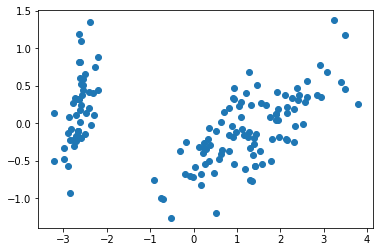

In [11]:
import matplotlib.pyplot as plt

plt.scatter(X_reduced[:,0], X_reduced[:,1]);

In [ ]:
!pip install yellowbrick==1.1

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


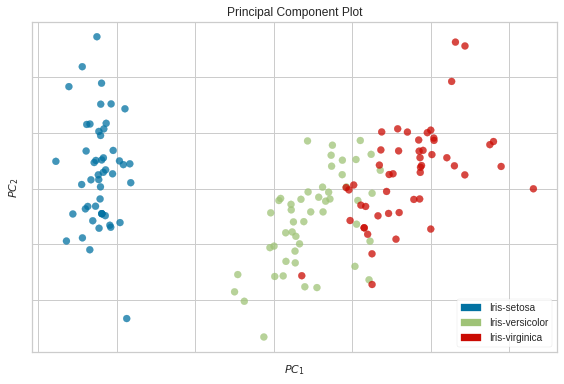

In [13]:
from yellowbrick.features import PCA

y = df['target'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})

classes = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
visualizer = PCA(scale=True, classes=classes);
visualizer.fit_transform(X, y);
visualizer.show();

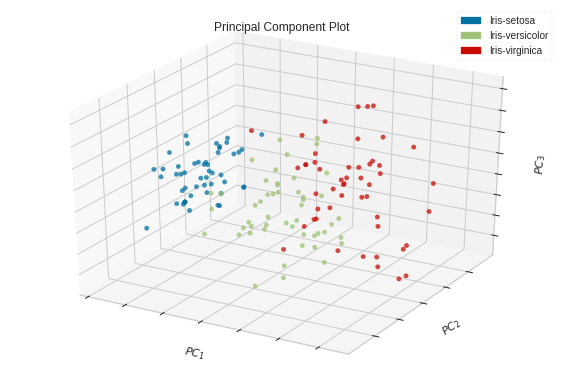

In [14]:
# Com o yellowbrick podemos também plotar o PCA em 3D, usando os 3 principais componentes.
visualizer = PCA(scale=True, projection=3, classes=classes)
visualizer.fit_transform(X, y)
visualizer.show();

# Biplot
Percebemos com o PCA que, em 2D ou em 3D e utilizando os principais componentes conseguimos clusterizar a nossa base em 3 clusters! Podemos também usar o PCA para criarmos um `biplot`, que faz a visualização do PCA mais os vetores para cada feature apontando na direção da máxima variação para aquela feature.

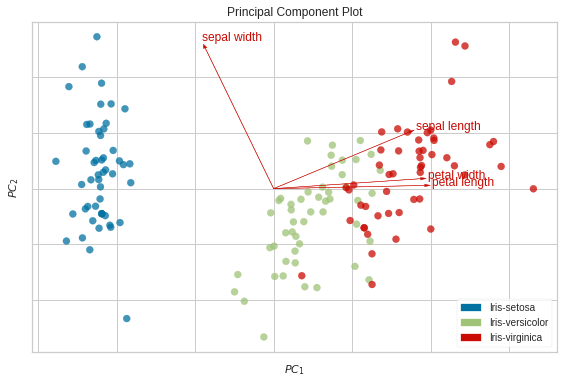

In [15]:
visualizer = PCA(scale=True, projection=2, proj_features=True, classes=classes)
visualizer.fit_transform(X, y);
visualizer.show();

Podemos ver da figura que quanto maior o valor da variável $PC_2$ e menor o valor de $PC_1$, temos um valor maior de `sepal width`. 

# PCA + KMeans

Já sabemos que aplicando o PCA na nossa base de flores conseguimos reduzir de 4 para 2 dimensões, mantendo os 3 clusters (cada tipo de flor) bem definidos. Vamos agora aplicar um KMeans para encontrarmos esses clusters!

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca = make_pipeline(StandardScaler(), PCA(n_components=2))
X_reduced = pd.DataFrame(pca.fit_transform(X), columns=['pc1', 'pc2'])
X_reduced.head()

,pc1,pc2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [17]:
X.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [20]:
pca[1]

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [21]:
# o primeiro componente principal (pc1) explica a variância de 72% dos dados, enquanto o segundo explica 23%.
# cumulativamente, ambos explicam 95% da variação dos dados.
pca[1].explained_variance_ratio_

array([0.72770452, 0.23030523])

In [22]:
np.sum(pca[1].explained_variance_ratio_)

0.9580097536148197

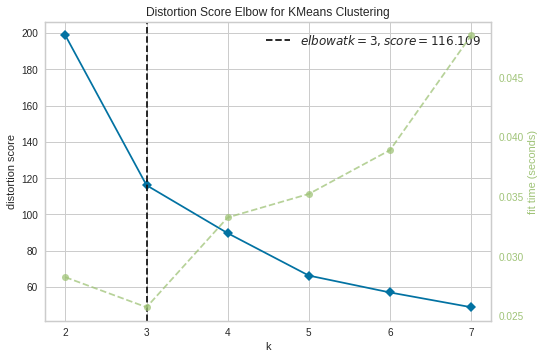

In [27]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

kmeans = KMeans(random_state=1234)
visualizer = KElbowVisualizer(kmeans, k=(2, 8))
visualizer.fit(X_reduced)
visualizer.show();

In [28]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_reduced)
X_reduced['cluster_id'] = kmeans.labels_
X_reduced.head()

,pc1,pc2,cluster_id
0,-2.264542,0.505704,1
1,-2.086426,-0.655405,1
2,-2.367950,-0.318477,1
3,-2.304197,-0.575368,1
4,-2.388777,0.674767,1


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


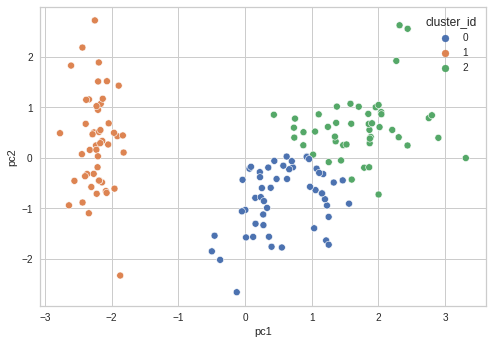

In [29]:
import seaborn as sns
sns.scatterplot(X_reduced['pc1'], X_reduced['pc2'], hue=X_reduced['cluster_id'], palette='deep');

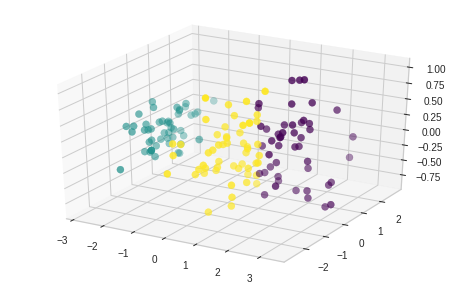

In [30]:
import matplotlib.pyplot as plt

# reduzindo para 3 dimensões com o PCA e plotando o scatterplot tridimensional
pca = make_pipeline(StandardScaler(), PCA(n_components=3))
X_reduced_3d = pd.DataFrame(pca.fit_transform(X), columns=['pc1', 'pc2', 'pc3'])

kmeans = KMeans(n_clusters=3)
kmeans.fit(X_reduced_3d)

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_reduced_3d['pc1'], X_reduced_3d['pc2'], X_reduced_3d['pc3'], c=kmeans.labels_, cmap='viridis', s=50)
plt.show()

O KMeans + PCA fez um ótimo trabalho encontrando os 3 clusters existentes. Apesar de alguns erros, principalmente na fronteira entre os clusters 0 e 2, mesmo assim fica demonstrado que aplicar um PCA **pode** revelar uma estrutura segmentada interna nos dados, além de reduzir para 2 ou 3 dimensões, o que facilita a visualização e interpretação!

In [31]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_reduced)
X_reduced['cluster_id'] = kmeans.labels_

df.groupby(kmeans.labels_).mean()

,sepal length,sepal width,petal length,petal width
0,5.006000,3.418000,1.464000,0.244000
1,6.780851,3.095745,5.510638,1.972340
2,5.801887,2.673585,4.369811,1.413208


O cluster 0 apresenta o maior valor médio da variável `sepal width`, como já havia sido evidenciado no `Biplot`.